# Loading th1 data models

### Table of contents

1. [**One-dimensional regression**](#1D)
2. [**Two-dimensional regression**](#2D)



In [2]:
%load_ext autoreload
%autoreload

import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../fit/")
import th1

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np


import analyze_th1
import utils

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/scripts/analysis/../../../GaussNeuro/gaussneuro/likelihoods/renewal.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

seed = 123
rng = np.random.default_rng(seed)
prng_state = jr.PRNGKey(seed)
batch_size = 10000


In [4]:
data_path = '../../data/th1/'
checkpoint_dir = '../checkpoint/'

In [5]:
### load dataset ###
session_name = 'Mouse28_140313_wake_isi5'
max_ISI_order = 4

select_fracs = [0.0, 0.5]
dataset_dict = th1.spikes_dataset(session_name, data_path, max_ISI_order, select_fracs)

test_select_fracs = [
    [0.5, 0.6], 
    [0.6, 0.7], 
    [0.7, 0.8], 
    [0.8, 0.9], 
    [0.9, 1.0], 
]
test_dataset_dicts = [
    th1.spikes_dataset(session_name, data_path, max_ISI_order, tf) for tf in test_select_fracs
]

In [6]:
### names ###
reg_config_names = [
    'Mouse28_140313_wakeISI5sel0.0to0.5_PP-log__factorized_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_gamma-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_lognorm-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_invgauss-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wake_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-40-matern32-matern32-1000-n2._' + \
    'X[hd]_Z[]_freeze[obs_model0log_warp_tau]', 
    'Mouse28_140313_wake_isi5ISI5sel0.0to0.5_PP-log_rcb-16-17.-36.-6.-30.-self-H500_' + \
    'factorized_gp-8-1000_X[hd]_Z[]_freeze[obs_model0spikefilter0a-' + \
    'obs_model0spikefilter0log_c-obs_model0spikefilter0phi]', 
    'Mouse28_140313_wake_isi5ISI5sel0.0to0.5_lognorm-log_rcb-16-17.-36.-6.-30.-self-H500_' + \
    'rate_renewal_gp-8-1000_X[hd]_Z[]_freeze[]',
    'Mouse28_140313_wake_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-40-matern32-matern32-1000-n2._' + \
    'X[hd]_Z[]_freeze[obs_model0log_warp_tau]', 
    'Mouse28_140313_wake_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-40-matern32-matern32-1000-n2._' + \
    'X[hd]_Z[]_freeze[]', 
]

tuning_model_name = reg_config_names[-1]


In [ ]:
regression_dict = utils.evaluate_regression_fits(
    checkpoint_dir, reg_config_names, th1.observed_kernel_dict_induc_list, 
    dataset_dict, test_dataset_dicts, rng, prng_state
)

Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_PP-log__factorized_gp-8-1000_X[hd]_Z[]...
Training data...


  0%|          | 0/33 [00:00<?, ?it/s]

Test data...


  0%|          | 0/5 [00:00<?, ?it/s]

Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_gamma-log__rate_renewal_gp-8-1000_X[hd]_Z[]...
Training data...


  0%|          | 0/33 [00:00<?, ?it/s]

Test data...


  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
tuning_dict = analyze_th1.tuning(
    checkpoint_dir, tuning_model_name, dataset_dict, rng, prng_state, batch_size
)

Analyzing tuning for Mouse28_140313_wake_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-40-matern32-matern32-1000-n2._X[hd]_Z[]_freeze[]...


UnboundLocalError: local variable 'pos_x_locs' referenced before assignment

In [23]:
variability_dict = utils.analyze_variability_stats(
    checkpoint_dir, tuning_model_name, th1.observed_kernel_dict_induc_list, 
    dataset_dict, rng, prng_state, 
    num_samps = 3,#30, 
    dilation = 50000, 
    int_eval_pts = 10,#1000, 
    num_quad_pts = 3,#100, 
    batch_size = 100, 
    jitter = 1e-6, 
)

Analyzing tuning for Mouse28_140313_wake_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-40-matern32-matern32-1000-n2._X[hd]_Z[]_freeze[]...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

TypeError: __init__() missing 1 required positional argument: 'variance'

In [30]:
regression_dict[reg_config_names[0]].keys()

dict_keys(['train_ells', 'test_lpds', 'pred_log_intensities', 'test_spikes', 'KS_quantiles', 'KS_statistic', 'KS_significance', 'KS_p_value'])

In [1]:
import matplotlib.pyplot as plt
plt.style.use(['../plots/paper.mplstyle'])

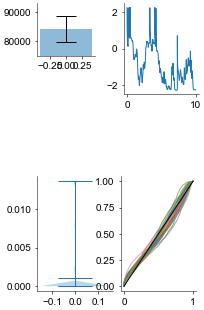

In [11]:
fig = plt.figure(figsize=(8, 4))

#fig.text(0.22, 1.05, 'repeatable trials', fontsize=12, ha='center')
#fig.text(0.78, 1.05, 'naturalistic behaviour', fontsize=12, ha='center')


### likelihoods ###
widths = [1]
heights = [1, 1]

spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, top=1.0, bottom=0.6, 
                        left=0.0, right=0.1, wspace=0.1)

mdls = len(reg_config_names)
test_lls = np.array([regression_dict[n]['test_ells'] for n in reg_config_names])
train_lls = np.array([regression_dict[n]['train_ell'] for n in reg_config_names])

ax = fig.add_subplot(spec[0, 0])
means = test_lls.mean(-1)
sems = test_lls.std(-1) / np.sqrt(test_lls.shape[-1])
ax.bar(np.arange(mdls), means, yerr=sems, 
       align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(7.5 * 1e4)

# ax = fig.add_subplot(spec[1, 0])
# means = train_lls
# ax.bar(np.arange(mdls), means, 
#        align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylim(3.5 * 1e5)



widths = [1, 1, 1, 1, 1, 1]
heights = [1, 0.1]

spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, top=1.0, bottom=0.6, 
                        left=0.15, right=1., hspace=0.3, wspace=0.1)

test_fold = 0
ne = 0
for en, n in enumerate(reg_config_names):
    pred_lint = regression_dict[n]['pred_log_intensities']
    pred_ts = regression_dict[n]['pred_ts']
    ax = fig.add_subplot(spec[0, en])
    ax.plot(pred_ts, pred_lint[test_fold][0, ne, :])
    #sts = regression_dict[n]['pred_spiketimes'][test_fold][ne]
    #ax = fig.add_subplot(spec[1, en])
    #for st in sts:
    #    ax.plot(st*np.ones(2), np.linspace(0, 1, 2))


### KS statistics ###
widths = [1, 1, 1, 1, 1, 1, 1]
heights = [1]

spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, top=0.4, bottom=0.0, 
                        left=0.0, right=1., wspace=0.1)

ax = fig.add_subplot(spec[0, 0])

mdls = len(reg_config_names[:1])
p_vals = [regression_dict[n]['KS_p_value'] for n in reg_config_names]
#p_vals = [[0 if v is None else v for v in d] for d in p_vals]

ax.violinplot(
    p_vals, list(range(mdls)), points=20, widths=0.3,
    showmeans=True, showextrema=True, showmedians=True, 
    bw_method=1e-2, #'silverman', 
)

for en, n in enumerate(reg_config_names):
    quantiles = regression_dict[n]['KS_quantiles']

    ax = fig.add_subplot(spec[0, en + 1])
    for n in range(len(quantiles)):
        if quantiles[n] is not None:
            ax.plot(np.linspace(0., 1., len(quantiles[n])), quantiles[n], alpha=0.7)
    ax.plot(np.linspace(0., 1., 100), np.linspace(0., 1., 100), c='k')






plt.show()

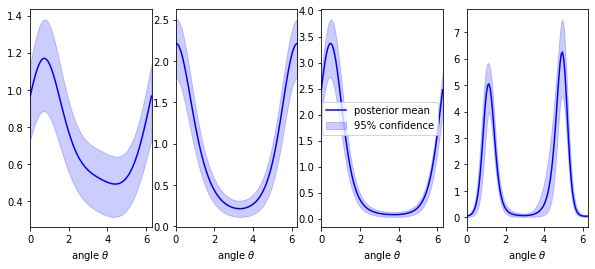

In [18]:
tr = list(range(num_samps))
plot_neurons = 4

fig, axes = plt.subplots(1, plot_neurons, figsize=(10, 4))

for f_dim in range(plot_neurons):
    ax = axes[f_dim]

    line, = ax.plot(x_eval_tun[0, 0, :, 0], post_quantiles[1][f_dim, :], 'b', label='posterior mean')
    ax.fill_between(x_eval_tun[0, 0, :, 0], post_quantiles[0][f_dim, :], post_quantiles[2][f_dim, :], 
                    color=line.get_color(), alpha=0.2, label='95% confidence')
    ax.set_xlim([x_eval_tun[0, 0, 0, 0], x_eval_tun[0, 0, -1, 0]])
    ax.set_xlabel(r'angle $\theta$')
    #ax.set_ylabel(r'$L = {}$'.format(Ls[s]))

    if f_dim == 2:
        ax.legend()
        
    #line, = ax.plot(covariates, rate[f_dim, :])
        

plt.show()

In [17]:
ISIs = dataset_dict['ISIs']
print(dataset_dict['properties']['tbin'])

0.001


In [18]:
def log_time_transform(t, inverse, warp_tau):
    """
    Inverse transform is from tau [0, 1] to t in R

    :param jnp.ndarray t: time of shape (obs_dims,)
    """
    if inverse:
        t_ = -np.log(1 - t) * warp_tau
    else:
        s = np.exp(-t / warp_tau)
        t_ = 1 - s

    return t_

In [34]:
n = 6
_ISIs = ISIs[:, n:n+1, :]

uisi = np.unique(_ISIs[..., 1])
uisi = uisi[~np.isnan(uisi)]
warp_tau = np.array([uisi.mean()])


tISI = log_time_transform(_ISIs[..., 0], False, warp_tau)
tISIs = log_time_transform(_ISIs[..., 1], False, warp_tau)

tuisi = np.unique(tISIs)
tuisi = tuisi[~np.isnan(tuisi)]

print(uisi.mean())

1.5766722


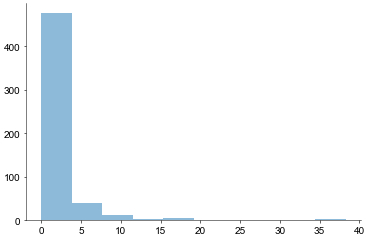

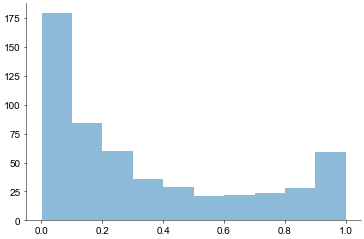

In [20]:
plt.hist(uisi, alpha=0.5)
plt.show()

plt.hist(tuisi, alpha=0.5)
plt.show()

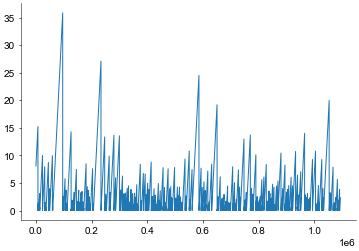

In [21]:
plt.plot(ISIs[:, 0, 0])

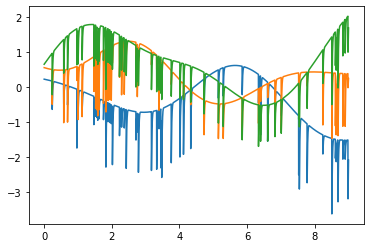

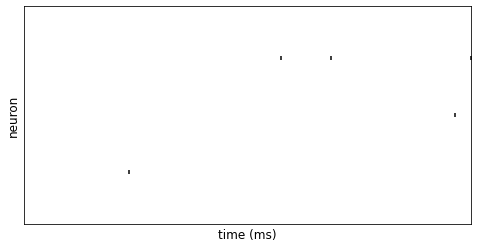

In [30]:
tr = 0

plt.plot(timestamps, log_rho_ts[tr, :, :].T)
plt.show()


fig, ax = plt.subplots(figsize=(8,4))
fig.set_facecolor('white')

lib.utils.plots.raster_plot((fig, ax), y_samples[tr, :, :], ts, dt*1000, neurons, markersize=10)
lib.utils.plots.decorate_ax(ax, xlabel='time (ms)', ylabel='neuron')

plt.show()